### An object-oriented perceptron API

In [186]:
##An object-oriented perceptron API
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [205]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Reading-in the Iris data

In [206]:
import os
import pandas as pd


df = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Adeline Code/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


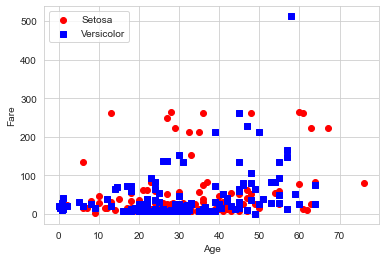

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:400, 1].values
# y = np.where(y == 'male', 0, 1)

# extract Age and fare 
X = df.iloc[0:400, [5, 9]].values

# plot data
plt.scatter(X[:200, 0], X[:200, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[200:400, 0], X[200:400, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [232]:
# y = df1.iloc[0:891, 0].values


# X = df1.iloc[0:891, [1,8]].values

# #read test data
# x_t = df1.iloc[0:418, [1,8]].values

xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
x

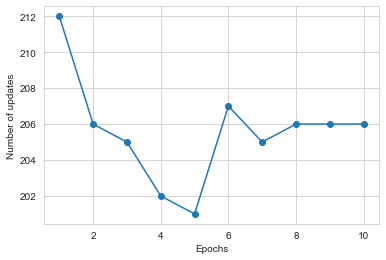

In [244]:
ppn = Perceptron(eta=0.0001, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### A function for plotting decision regions

In [234]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

### Plotting the decision region for the trained iris classifier

In [235]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Age ')
plt.ylabel('Fare')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

ValueError: arange: cannot compute length

In [236]:
###drop unnecessary infomation by columns
df1 = df.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,"Kelly, Mr. James",male,34.5,0,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1


In [237]:

#Find out master or miss or mlle, then drop Name
def get_mmm(passenger):
    name = passenger
    if(   ('Master' in str(name)) \
       or ('Miss'   in str(name)) \
       or ('Mlle'   in str(name))):
        return 1
    else:
        return 0

df1['MMM'] = df1[['Name']].apply(get_mmm, axis = 1)
df1= df1.drop(['Name'], axis = 1)


c:\Users\teddy\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\teddy\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\teddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


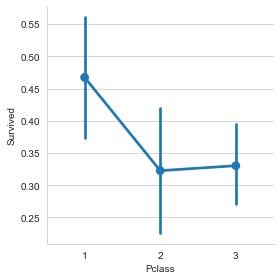

In [238]:
##Pclass

sns.factorplot('Pclass', 'Survived', order = [1,2,3], data = df1, size = 4)

#Create dummy variables for Pclass
pc_dummy_tit = pd.get_dummies(df1['Pclass'])


pc_dummy_tit.columns = ['Class_1', 'Class_2', 'Class_3']


df1 = df1.join(pc_dummy_tit)


In [239]:
##Sex

#Create dummy variables for Sex, then drop Sex
sex_dummy_tit = pd.get_dummies(df1['Sex'])


df1= df1.join(sex_dummy_tit)


df1 = df1.drop(['Sex'], axis = 1)


In [240]:
#Seperate passengers who has parent or children with passengers who doesn't
def Pch_sep(passenger):
    parch = passenger
    if(parch > 0):
        return 1
    else:
        return 0

df1['Parch'] = df1['Parch'].apply(Pch_sep)


In [241]:
##Now I have the idea 
#Maybe the servival rate will be higher for children than for parents
#Because parents will try their best to let their children live
#Also high class passengers and female passengers should have more chance to survive

#So I make following assumption:
#Passengers' name with Master, Miss, Mlle should more likely to be children or teenagers
#If their Parch value is 1, means they should be child of someone
#So they may have a batter survival rate
print("Amound of people under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['Parch', 'female', 'MMM'], \
                    columns=['Pclass'], \
                    aggfunc='count')
print( table0e.iloc[::-1],'\n' )


print("Percent of survival under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['Parch', 'female', 'MMM'], \
                    columns=['Pclass'], \
                    aggfunc=np.mean)
print( table0e.iloc[::-1],'\n' )

Amound of people under each condition:
Pclass               1     2      3
Parch female MMM                   
1     1      1     3.0   9.0   10.0
             0    14.0   5.0   12.0
      0      1     2.0   2.0   16.0
             0     9.0   5.0    7.0
0     1      1    11.0   7.0   38.0
             0    22.0   9.0   12.0
      0      1     NaN   NaN    1.0
             0    46.0  56.0  122.0 

Percent of survival under each condition:
Pclass              1    2    3
Parch female MMM               
1     1      1    1.0  1.0  1.0
             0    1.0  1.0  1.0
      0      1    0.0  0.0  0.0
             0    0.0  0.0  0.0
0     1      1    1.0  1.0  1.0
             0    1.0  1.0  1.0
      0      1    NaN  NaN  0.0
             0    0.0  0.0  0.0 



In [242]:
y = df1.iloc[0:891, 0].values


X = df1.iloc[0:891, [1,8]].values

#read test data
x_t = df1.iloc[0:418, [1,8]].values

xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  1 Prediction:  1
xi:  [2 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [3 1] Target:  1 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [1 0] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
xi:  [3 1] Target:  0 Prediction:  1
xi:  [1 0] Target:  1 Prediction:  1
x

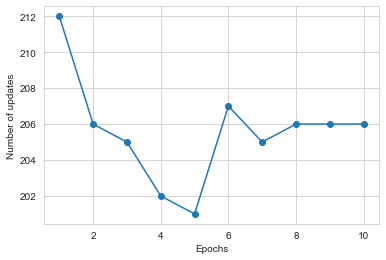

In [243]:
ppn = Perceptron(eta=0.0001, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [216]:
#Since most training data is 1 and 0
#In order to use Adline, data should not have very large differenc
#Which means age values are too extreme need to be rearange to between 0-1
def norm_age(x):
    age = x
    return age/80

df1['Age'] = df1['Age'].apply(norm_age)


#Finally drop column that are just used for preview datas: Pclass
#Also drop column that are not very much affecting their survival rates: SibSp
df1 = df1.drop(['Pclass', 'SibSp'], axis = 1)


#Review data file
df1.head()


,Survived,Age,Parch,MMM,Class_1,Class_2,Class_3,female,male
0,0,0.43125,0,0,0,0,1,0,1
1,1,0.58750,0,0,0,0,1,1,0
2,0,0.77500,0,0,0,1,0,0,1
3,0,0.33750,0,0,0,0,1,0,1
4,1,0.27500,1,0,0,0,1,1,0


### A function for plotting decision regions

In [245]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [246]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

## Large scale machine learning and stochastic gradient descent

In [247]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [248]:
y = df1.iloc[0:891, 0].values


x = df1.iloc[0:891, [1,8]].values

#read test data
x_t = df1.iloc[0:418, [1,8]].values

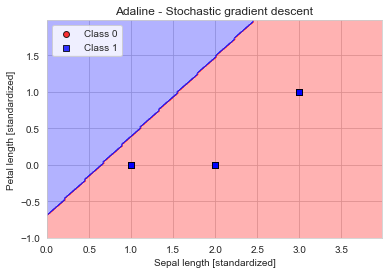

In [249]:
ada_sgd = AdalineSGD(n_iter=200, eta=0.001, random_state=1)
ada_sgd.fit(x, y)

plot_decision_regions(x, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')